### 1. Load Datasets
Loading test, train and validation sets into pandas dataframe

In [2]:
import pandas as pd

df_train = pd.read_json('data/raw/train.json', lines=True)
df_test = pd.read_json('data/raw/test.json', lines=True)
df_validation = pd.read_json('data/raw/validation.json', lines=True)

### 2. Exploratory Data Analysis (Sayeed, Jui)
#### Analyzing training dataset

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1112 entries, 0 to 1111
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   quality_checked  1112 non-null   object
 1   text             1112 non-null   object
 2   task             1112 non-null   object
 3   meta             1112 non-null   object
 4   doc_id           1112 non-null   object
 5   dataset_type     1112 non-null   object
 6   annotator_id     1112 non-null   object
 7   entity_mentions  1112 non-null   object
dtypes: object(8)
memory usage: 69.6+ KB


Observed no null values

In [4]:
df_train.head()

,quality_checked,text,task,meta,doc_id,dataset_type,annotator_id,entity_mentions
0,[],PROCEDURE\n\nThe case originated in an applica...,Task: Annotate the document to anonymise the f...,"{'applicant': 'Henrik Hasslund', 'articles': [...",001-90194,train,annotator1,"[{'confidential_status': 'NOT_CONFIDENTIAL', '..."
1,[],PROCEDURE\n\nThe case originated in an applica...,Task: Annotate the document to anonymise the f...,"{'applicant': 'Henrik Hasslund', 'articles': [...",001-90194,train,annotator2,"[{'confidential_status': 'NOT_CONFIDENTIAL', '..."
2,[],PROCEDURE\n\nThe case originated in an applica...,Task: Annotate the document to anonymise the f...,"{'applicant': 'Henrik Hasslund', 'articles': [...",001-90194,train,annotator8,"[{'confidential_status': 'NOT_CONFIDENTIAL', '..."
3,[],PROCEDURE\n\nThe case originated in an applica...,Task: Annotate the document to anonymise the f...,"{'applicant': 'Henrik Hasslund', 'articles': [...",001-90194,train,annotator11,"[{'confidential_status': 'NOT_CONFIDENTIAL', '..."
4,[],PROCEDURE\n\nThe case originated in an applica...,Task: Annotate the document to anonymise the f...,"{'applicant': 'D. Stępniak', 'articles': [91, ...",001-84741,train,annotator1,"[{'confidential_status': 'NOT_CONFIDENTIAL', '..."


Observation: We do not need dataset_type because the test, train and validation files are already separate. We also do not need the columns quality_checked, annotator_id.

Dropping unrequired columns.

In [5]:
df_train.drop(columns=['quality_checked', 'dataset_type', 'annotator_id'])

,text,task,meta,doc_id,entity_mentions
0,PROCEDURE\n\nThe case originated in an applica...,Task: Annotate the document to anonymise the f...,"{'applicant': 'Henrik Hasslund', 'articles': [...",001-90194,"[{'confidential_status': 'NOT_CONFIDENTIAL', '..."
1,PROCEDURE\n\nThe case originated in an applica...,Task: Annotate the document to anonymise the f...,"{'applicant': 'Henrik Hasslund', 'articles': [...",001-90194,"[{'confidential_status': 'NOT_CONFIDENTIAL', '..."
2,PROCEDURE\n\nThe case originated in an applica...,Task: Annotate the document to anonymise the f...,"{'applicant': 'Henrik Hasslund', 'articles': [...",001-90194,"[{'confidential_status': 'NOT_CONFIDENTIAL', '..."
3,PROCEDURE\n\nThe case originated in an applica...,Task: Annotate the document to anonymise the f...,"{'applicant': 'Henrik Hasslund', 'articles': [...",001-90194,"[{'confidential_status': 'NOT_CONFIDENTIAL', '..."
4,PROCEDURE\n\nThe case originated in an applica...,Task: Annotate the document to anonymise the f...,"{'applicant': 'D. Stępniak', 'articles': [91, ...",001-84741,"[{'confidential_status': 'NOT_CONFIDENTIAL', '..."
...,...,...,...,...,...
1107,PROCEDURE\n\nThe case originated in an applica...,Task: Annotate the document to anonymise the f...,"{'applicant': 'Helmut Ludescher', 'articles': ...",001-60002,"[{'confidential_status': 'NOT_CONFIDENTIAL', '..."
1108,PROCEDURE\n\nThe case originated in an applica...,Task: Annotate the document to anonymise the f...,"{'applicant': 'J. Peter', 'articles': [91, 34,...",001-146353,"[{'confidential_status': 'NOT_CONFIDENTIAL', '..."
1109,PROCEDURE\n\nThe case was referred to the Cour...,Task: Annotate the document to anonymise the f...,"{'applicant': 'Christopher Ian Scott', 'articl...",001-58010,"[{'confidential_status': 'NOT_CONFIDENTIAL', '..."
1110,PROCEDURE\n\nThe case originated in an applica...,Task: Annotate the document to anonymise the f...,"{'applicant': 'Henryk Kreuz', 'articles': [91,...",001-61921,"[{'confidential_status': 'NOT_CONFIDENTIAL', '..."


Analyzing task column

In [6]:
df_train['task'].unique()

array(['Task: Annotate the document to anonymise the following person: Henrik Hasslund',
       'Task: Annotate the document to anonymise the following person: D. Stępniak',
       'Task: Annotate the document to anonymise the following person: Nusret Amutgan',
       ...,
       'Task: Annotate the document to anonymise the following person: J. Peter',
       'Task: Annotate the document to anonymise the following person: Christopher Ian Scott',
       'Task: Annotate the document to anonymise the following person: Yiannis Kyriakou'],
      dtype=object)

Observation: we don't need the task column

Finding out how many unique values are there in text column and doc_id column. Making sure they match.

In [7]:
len(df_train['text'].unique())

1014

In [8]:
len(df_train['doc_id'].unique())

1014

Observation: We have 1014 unique values for documents but the dataset has 1112 entries. So there might be duplicates.

In [9]:
df_train['meta'][0]

{'applicant': 'Henrik Hasslund',
 'articles': [91, 34, 54, 34, 93],
 'countries': 'DNK',
 'legal_branch': 'CHAMBER',
 'year': 2008}

Observation: We may be able to reserve this column for later evaluation. Might be helpful to find out if our model struggles with region specific names, or has a bias, etc.

In [10]:
df_train_meta = df_train[['text', 'meta', 'doc_id']].copy()
df_train_meta.head()

,text,meta,doc_id
0,PROCEDURE\n\nThe case originated in an applica...,"{'applicant': 'Henrik Hasslund', 'articles': [...",001-90194
1,PROCEDURE\n\nThe case originated in an applica...,"{'applicant': 'Henrik Hasslund', 'articles': [...",001-90194
2,PROCEDURE\n\nThe case originated in an applica...,"{'applicant': 'Henrik Hasslund', 'articles': [...",001-90194
3,PROCEDURE\n\nThe case originated in an applica...,"{'applicant': 'Henrik Hasslund', 'articles': [...",001-90194
4,PROCEDURE\n\nThe case originated in an applica...,"{'applicant': 'D. Stępniak', 'articles': [91, ...",001-84741


In [11]:
df_train_meta.to_csv('data/processed/train_meta.csv')

In [12]:
df_test_meta = df_test[['text', 'meta', 'doc_id']].copy()
df_test_meta.to_csv('data/processed/test_meta.csv')

df_validation_meta = df_validation[['text', 'meta', 'doc_id']].copy()
df_validation_meta.to_csv('data/processed/validation_meta.csv')

Exploring entity mentions column

In [13]:
df_train['entity_mentions'][1]

[{'confidential_status': 'NOT_CONFIDENTIAL',
  'edit_type': 'check',
  'end_offset': 62,
  'entity_id': '001-90194_a2_e1',
  'entity_mention_id': '001-90194_a2_em1',
  'entity_type': 'CODE',
  'identifier_type': 'QUASI',
  'related_mentions': None,
  'span_text': '36244/06',
  'start_offset': 54},
 {'confidential_status': 'NOT_CONFIDENTIAL',
  'edit_type': 'correct',
  'end_offset': 94,
  'entity_id': '001-90194_a2_e2',
  'entity_mention_id': '001-90194_a2_em2',
  'entity_type': 'ORG',
  'identifier_type': 'QUASI',
  'related_mentions': None,
  'span_text': 'Kingdom of Denmark',
  'start_offset': 76},
 {'confidential_status': 'NOT_CONFIDENTIAL',
  'edit_type': 'check',
  'end_offset': 242,
  'entity_id': '001-90194_a2_e3',
  'entity_mention_id': '001-90194_a2_em3',
  'entity_type': 'DEM',
  'identifier_type': 'QUASI',
  'related_mentions': None,
  'span_text': 'Danish',
  'start_offset': 236},
 {'confidential_status': 'NOT_CONFIDENTIAL',
  'edit_type': 'check',
  'end_offset': 271,
  '

In [14]:
import json
df_train_exploded = df_train.explode('entity_mentions')
entities_flat = pd.json_normalize(df_train_exploded['entity_mentions'])
df_train_entities = pd.concat([df_train_exploded[['doc_id']].reset_index(drop=True), entities_flat.reset_index(drop=True)], axis=1)

df_train_entities.head()

,doc_id,confidential_status,edit_type,end_offset,entity_id,entity_mention_id,entity_type,identifier_type,related_mentions,span_text,start_offset
0,001-90194,NOT_CONFIDENTIAL,check,62,001-90194_a1_e1,001-90194_a1_em1,CODE,DIRECT,None,36244/06,54
1,001-90194,NOT_CONFIDENTIAL,correct,94,001-90194_a1_e2,001-90194_a1_em2,ORG,NO_MASK,None,Kingdom of Denmark,76
2,001-90194,NOT_CONFIDENTIAL,check,242,001-90194_a1_e3,001-90194_a1_em3,DEM,NO_MASK,None,Danish,236
3,001-90194,NOT_CONFIDENTIAL,check,271,001-90194_a1_e4,001-90194_a1_em4,PERSON,DIRECT,None,Mr Henrik Hasslund,253
4,001-90194,NOT_CONFIDENTIAL,check,308,001-90194_a1_e5,001-90194_a1_em5,DATETIME,QUASI,None,31 August 2006,294


Observation: We have start_offset, end_offset and entity_type. We need to extract this data to create a token and tags for finetuning DistilliBERT model.

Checking the counts of entities for filtered set where identifier_type is not NO_MASK

Entity Type Counts:


<Axes: title={'center': 'Distribution of Entity Types'}, xlabel='entity_type'>

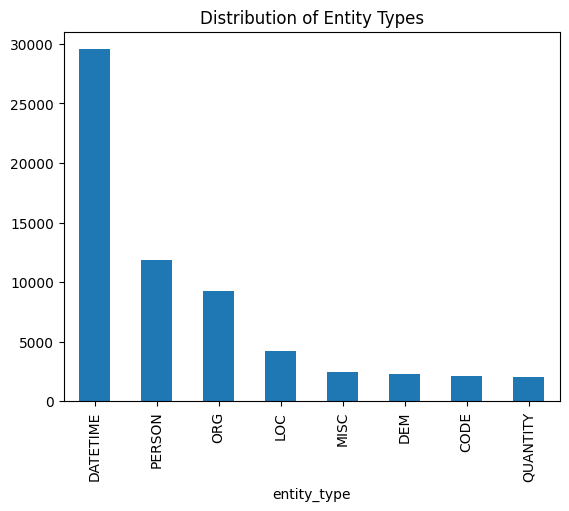

In [15]:
print("Entity Type Counts:")
entity_type_stats = df_train_entities[df_train_entities['identifier_type'] != 'NO_MASK']['entity_type'].value_counts()
entity_type_stats.plot(kind='bar', title='Distribution of Entity Types')

Certain imbalance of data is seen here where datetime entities are much higher in count than quantity or code

<Axes: title={'center': 'Distribution of Masking Needs'}, xlabel='identifier_type'>

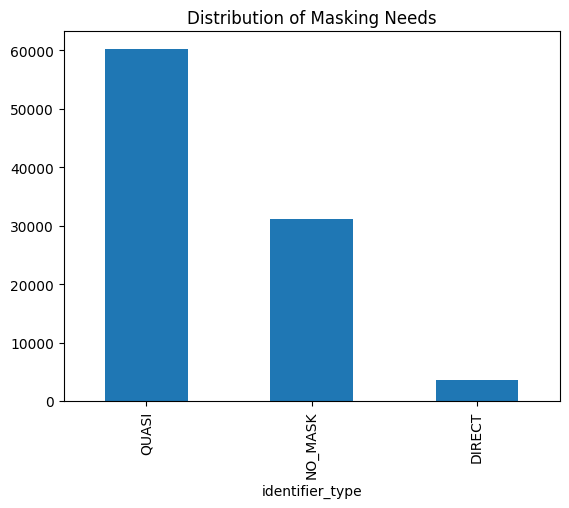

In [16]:
# Check masking requirements
mask_stats = df_train_entities['identifier_type'].value_counts()
mask_stats.plot(kind='bar', title='Distribution of Masking Needs')

<Axes: title={'center': 'Entities per Document Distribution'}, xlabel='Number of Entities', ylabel='Number of Documents'>

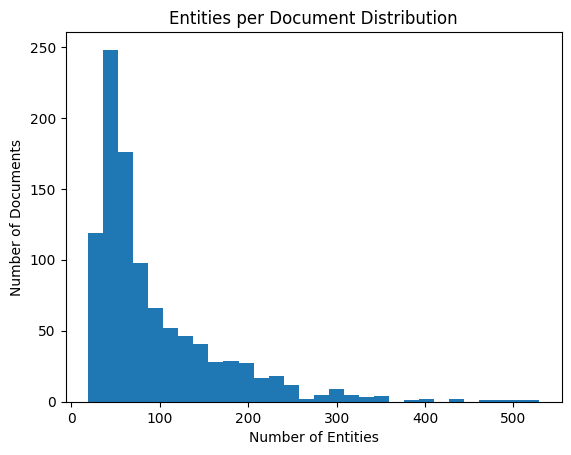

In [17]:
entities_per_doc = df_train_entities.groupby('doc_id').size().sort_values(ascending=False)
entities_per_doc.plot(kind='hist', bins=30, title='Entities per Document Distribution', xlabel='Number of Entities', ylabel='Number of Documents')

In [18]:
print(f"Average entities per document: {entities_per_doc.mean():.2f}")

Average entities per document: 93.72


### 3. Data pre-processing (Jui)
Converting offests to list

In [19]:
def convert_offsets_to_lists(row):
    text = row['text']
    entities = row['entity_mentions']

    # create character-level map
    char_tags = ["O"] * len(text)

    for ent in entities:
        # Filter 'NO_MASK' entities
        if ent.get('identifier_type') == 'NO_MASK':
            continue

        start, end = ent['start_offset'], ent['end_offset']
        label = ent['entity_type']

        # fill character-level map
        if start < len(text) and end <= len(text):
            char_tags[start] = f"B-{label}" # beginning of entity
            for i in range(start+1, end):
                char_tags[i] = f"I-{label}" # inside entity

    # convert character map to word - tag
    tokens = text.split()
    ner_tags = []

    cursor = 0
    for token in tokens:
        # advance cursor to the start of word (skipping spaces)
        while cursor < len(text) and text[cursor].isspace():
            cursor += 1

        # tag of the word is the tag of its first character
        if cursor < len(text):
            ner_tags.append(char_tags[cursor])
            cursor += len(token)
        else:
            ner_tags.append("O")

    return {"tokens": tokens, "ner_tags": ner_tags}

In [20]:
from datasets import Dataset

# converting Pandas to Hugging Face Dataset
hf_train = Dataset.from_pandas(df_train)
train_processed = hf_train.map(convert_offsets_to_lists)

# Quick Check:
print(train_processed[0]['tokens'])
print(train_processed[0]['ner_tags'])

Map:   0%|          | 0/1112 [00:00<?, ? examples/s]

['PROCEDURE', 'The', 'case', 'originated', 'in', 'an', 'application', '(no.', '36244/06)', 'against', 'the', 'Kingdom', 'of', 'Denmark', 'lodged', 'with', 'the', 'Court', 'under', 'Article', '34', 'of', 'the', 'Convention', 'for', 'the', 'Protection', 'of', 'Human', 'Rights', 'and', 'Fundamental', 'Freedoms', '(“the', 'Convention”)', 'by', 'a', 'Danish', 'national,', 'Mr', 'Henrik', 'Hasslund', '(“the', 'applicant”),', 'on', '31', 'August', '2006.', 'The', 'applicant', 'was', 'represented', 'by', 'Mr', 'Tyge', 'Trier,', 'a', 'lawyer', 'practising', 'in', 'Copenhagen.', 'The', 'Danish', 'Government', '(“the', 'Government”)', 'were', 'represented', 'by', 'their', 'Agent,', 'Ms', 'Nina', 'Holst-Christensen', 'of', 'the', 'Ministry', 'of', 'Justice.', 'On', '5', 'September', '2007', 'the', 'Acting', 'President', 'of', 'the', 'Fifth', 'Section', 'decided', 'to', 'give', 'notice', 'of', 'the', 'application', 'to', 'the', 'Government.', 'It', 'was', 'also', 'decided', 'to', 'rule', 'on', 'the

Create label mappings from train set to be used to pass when training the model, same mappings would be used during tokenization of test and validation sets as well

In [21]:
# extracting unique tags from training data
unique_tags = set(tag for row in train_processed for tag in row['ner_tags'])
label_list = sorted(list(unique_tags)) # e.g., ['B-LOC', 'B-PER', 'I-PER', 'O']

# createing maps
label2id = {label: i for i, label in enumerate(label_list)}
id2label = {i: label for i, label in enumerate(label_list)}

print(f"Number of labels: {len(label_list)}")
print(label2id)

Number of labels: 17
{'B-CODE': 0, 'B-DATETIME': 1, 'B-DEM': 2, 'B-LOC': 3, 'B-MISC': 4, 'B-ORG': 5, 'B-PERSON': 6, 'B-QUANTITY': 7, 'I-CODE': 8, 'I-DATETIME': 9, 'I-DEM': 10, 'I-LOC': 11, 'I-MISC': 12, 'I-ORG': 13, 'I-PERSON': 14, 'I-QUANTITY': 15, 'O': 16}


Using AutoTokenizer to handle sub-words and align new tags. Defining tokenization function to be used various versions of BERT

In [24]:
def tokenize_and_align(examples, tokenizer):
  '''Takes the tokenizer object as input and operated on a row in huggingface dataset object'''
  # split words into sub-words
  tokenized_inputs = tokenizer(examples["tokens"], truncation=True, is_split_into_words=True)

  labels = []
  for i, label in enumerate(examples["ner_tags"]):
      word_ids = tokenized_inputs.word_ids(batch_index=i) #supported only for fast tokenizers
      previous_word_idx = None
      label_ids = []
      for word_idx in word_ids:
          if word_idx is None:
              # special tokens like [CLS] get -100 (ignored)
              label_ids.append(-100)
          elif word_idx != previous_word_idx:
              # first piece of a word gets the real label ID
              label_ids.append(label2id[label[word_idx]]) #using map created from training set
          else:
              # subsequent pieces (e.g., "##lor") get -100 (ignored)
              label_ids.append(-100)
          previous_word_idx = word_idx
      labels.append(label_ids)

  tokenized_inputs["labels"] = labels
  return tokenized_inputs

Writing a script for processing test and validation sets

In [30]:
def preprocess_data(df, tokenizer):
  '''Takes a pandas dataframe and a tokenizer object and returns a tokenized huggingface dataset object ready to be passed into BERT for training
  '''
  # converting Pandas to Hugging Face Dataset
  hf = Dataset.from_pandas(df)
  processed = hf.map(convert_offsets_to_lists)
  #tokenize
  tokenized = processed.map(tokenize_and_align, batched=True, fn_kwargs={"tokenizer": tokenizer})

  return tokenized

Importing AutoTokenizer to use various BERT tokenizers

In [31]:
from transformers import AutoTokenizer

## 4. LSTM (Jui)

Using DistilBERT tokenizer to keep the comparison fair

In [32]:
tokenizer_distilbert = AutoTokenizer.from_pretrained("distilbert-base-uncased")

In [33]:
train_distilbert = preprocess_data(df_train ,tokenizer_distilbert)

Map:   0%|          | 0/1112 [00:00<?, ? examples/s]

Map:   0%|          | 0/1112 [00:00<?, ? examples/s]

In [34]:
test_distilbert = preprocess_data(df_test, tokenizer_distilbert)
validation_distilbert = preprocess_data(df_validation, tokenizer_distilbert)

Map:   0%|          | 0/555 [00:00<?, ? examples/s]

Map:   0%|          | 0/555 [00:00<?, ? examples/s]

Map:   0%|          | 0/541 [00:00<?, ? examples/s]

Map:   0%|          | 0/541 [00:00<?, ? examples/s]

### 5. LegalBERT Finetuning (Liza)

Using legalBERT tokenizer

In [ ]:
#add for legalBERT
# tokenizer_legalbert = AutoTokenizer.from_pretrained("distilbert-base-uncased")

In [ ]:
# train_legalbert = preprocess_data(df_train ,tokenizer_legalbert)
# test_legalbert = preprocess_data(df_test, tokenizer_legalbert)
# validation_legalbert = preprocess_data(df_validation, tokenizer_legalbert)

### 7. DistilBERT Finetuning (Mit)

Using tokenized datasets: train_distilbert, test_distilbert, validation_distilbert

### 8. Pre-trained DistilBERT - Benchmarking (Sayed)

Using tokenized datasets: train_distilbert, test_distilbert, validation_distilbert

### 9. RoBERTa, BERT-NER, ALBERT
These are some more models that can be used. Feel free to pick any and start working